<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_cluster_data(y_hat)_add_delta_(4)_n30_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition/addition_delta_4'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_4_n30.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,24.043339,59.143796,99.417336,2560.615638,2753.220109,1355.059249,1398.160860
1,0.0,1.0,39.314959,89.214002,33.835416,5773.942064,5946.306440,3845.190588,2101.115853
2,0.0,2.0,63.757693,89.298030,22.010720,-112.082524,72.983919,3438.101112,-3365.117193
3,0.0,3.0,45.877593,88.209911,47.273701,16494.611781,16685.972987,3252.730925,13433.242062
4,0.0,4.0,83.124282,71.173549,22.892690,5043.309042,5230.499563,2118.337441,3112.162122
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,39.130597,57.821196,75.351252,-77.084896,105.218150,259.037805,-153.819655
29996,999.0,26.0,34.481639,87.768645,38.188798,8180.919940,8351.359022,1538.893849,6812.465173
29997,999.0,27.0,24.835591,65.412770,21.045603,-5718.732738,-5597.438774,-832.863951,-4764.574823
29998,999.0,28.0,46.363453,49.118866,27.563765,84.480144,217.526227,-1447.141511,1664.667738


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3             e             Y  \
rep   index                                                                
0.0   0.0    24.043339  59.143796  99.417336   2560.615638   2753.220109   
      1.0    39.314959  89.214002  33.835416   5773.942064   5946.306440   
      2.0    63.757693  89.298030  22.010720   -112.082524     72.983919   
      3.0    45.877593  88.209911  47.273701  16494.611781  16685.972987   
      4.0    83.124282  71.173549  22.892690   5043.309042   5230.499563   
...                ...        ...        ...           ...           ...   
999.0 25.0   39.130597  57.821196  75.351252    -77.084896    105.218150   
      26.0   34.481639  87.768645  38.188798   8180.919940   8351.359022   
      27.0   24.835591  65.412770  21.045603  -5718.732738  -5597.438774   
      28.0   46.363453  49.118866  27.563765     84.480144    217.526227   
      29.0   42.837919  53.041451  48.344412   2080.939018   2235.162800   

                   y_hat         e_hat  
rep   index                             
0.0   0.0    1355.059249   1398.160860  
      1.0    3845.190588   2101.115853  
      2.0    3438.101112  -3365.117193  
      3.0    3252.730925  13433.242062  
      4.0    2118.337441   3112.162122  
...                  ...           ...  
999.0 25.0    259.037805   -153.819655  
      26.0   1538.893849   6812.465173  
      27.0   -832.863951  -4764.574823  
      28.0  -1447.141511   1664.667738  
      29.0   -703.018031   2938.180831  

[30000 rows x 7 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3             e             Y  \
rep   index                                                                
0.0   0.0    24.043339  59.143796  99.417336   2560.615638   2753.220109   
      1.0    39.314959  89.214002  33.835416   5773.942064   5946.306440   
      2.0    63.757693  89.298030  22.010720   -112.082524     72.983919   
      3.0    45.877593  88.209911  47.273701  16494.611781  16685.972987   
      4.0    83.124282  71.173549  22.892690   5043.309042   5230.499563   
...                ...        ...        ...           ...           ...   
999.0 25.0   39.130597  57.821196  75.351252    -77.084896    105.218150   
      26.0   34.481639  87.768645  38.188798   8180.919940   8351.359022   
      27.0   24.835591  65.412770  21.045603  -5718.732738  -5597.438774   
      28.0   46.363453  49.118866  27.563765     84.480144    217.526227   
      29.0   42.837919  53.041451  48.344412   2080.939018   2235.162800   

                   y_hat         e_hat  
rep   index                             
0.0   0.0    1355.059249   1398.160860  
      1.0    3845.190588   2101.115853  
      2.0    3438.101112  -3365.117193  
      3.0    3252.730925  13433.242062  
      4.0    2118.337441   3112.162122  
...                  ...           ...  
999.0 25.0    259.037805   -153.819655  
      26.0   1538.893849   6812.465173  
      27.0   -832.863951  -4764.574823  
      28.0  -1447.141511   1664.667738  
      29.0   -703.018031   2938.180831  

[30000 rows x 7 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,24.043339,59.143796,99.417336,2560.615638,2753.220109,1355.059249,1398.160860
1,0.0,1.0,39.314959,89.214002,33.835416,5773.942064,5946.306440,3845.190588,2101.115853
2,0.0,2.0,63.757693,89.298030,22.010720,-112.082524,72.983919,3438.101112,-3365.117193
3,0.0,3.0,45.877593,88.209911,47.273701,16494.611781,16685.972987,3252.730925,13433.242062
4,0.0,4.0,83.124282,71.173549,22.892690,5043.309042,5230.499563,2118.337441,3112.162122
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,39.130597,57.821196,75.351252,-77.084896,105.218150,259.037805,-153.819655
29996,999.0,26.0,34.481639,87.768645,38.188798,8180.919940,8351.359022,1538.893849,6812.465173
29997,999.0,27.0,24.835591,65.412770,21.045603,-5718.732738,-5597.438774,-832.863951,-4764.574823
29998,999.0,28.0,46.363453,49.118866,27.563765,84.480144,217.526227,-1447.141511,1664.667738


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3             e             Y  \
rep   index                                                                
0.0   0.0    24.043339  59.143796  99.417336   2560.615638   2753.220109   
      1.0    39.314959  89.214002  33.835416   5773.942064   5946.306440   
      2.0    63.757693  89.298030  22.010720   -112.082524     72.983919   
      3.0    45.877593  88.209911  47.273701  16494.611781  16685.972987   
      4.0    83.124282  71.173549  22.892690   5043.309042   5230.499563   
...                ...        ...        ...           ...           ...   
999.0 25.0   39.130597  57.821196  75.351252    -77.084896    105.218150   
      26.0   34.481639  87.768645  38.188798   8180.919940   8351.359022   
      27.0   24.835591  65.412770  21.045603  -5718.732738  -5597.438774   
      28.0   46.363453  49.118866  27.563765     84.480144    217.526227   
      29.0   42.837919  53.041451  48.344412   2080.939018   2235.162800   

                   y_hat         e_hat  
rep   index                             
0.0   0.0    1355.059249   1398.160860  
      1.0    3845.190588   2101.115853  
      2.0    3438.101112  -3365.117193  
      3.0    3252.730925  13433.242062  
      4.0    2118.337441   3112.162122  
...                  ...           ...  
999.0 25.0    259.037805   -153.819655  
      26.0   1538.893849   6812.465173  
      27.0   -832.863951  -4764.574823  
      28.0  -1447.141511   1664.667738  
      29.0   -703.018031   2938.180831  

[30000 rows x 7 columns]

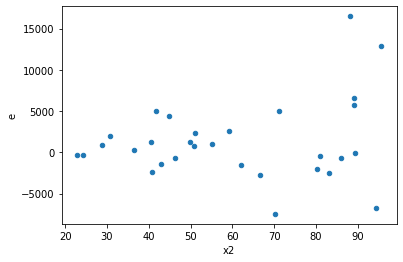

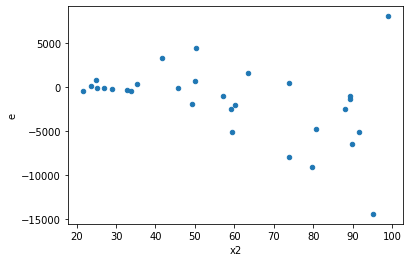

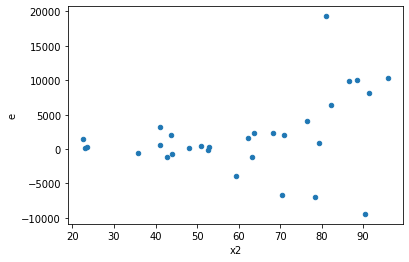

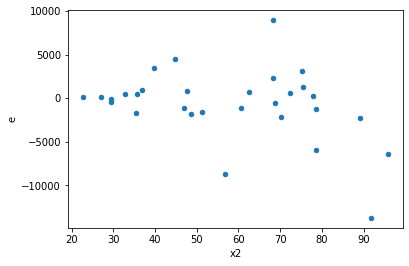

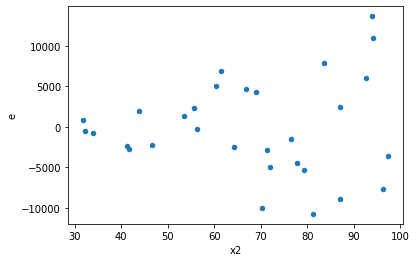

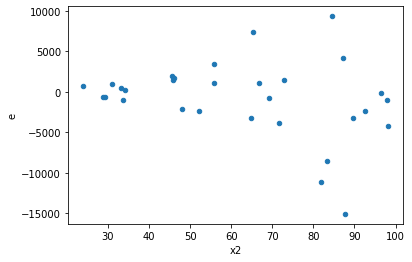

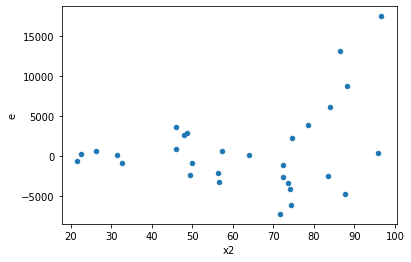

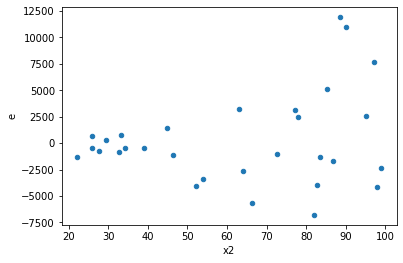

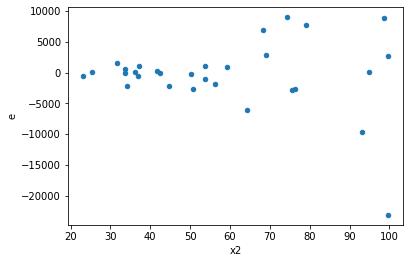

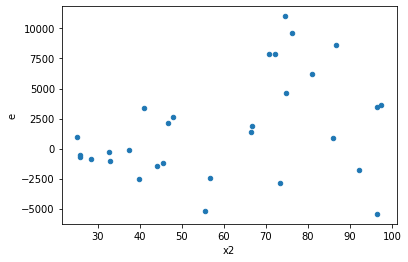

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
1.0,15.0,9.0,38020529.648374766,302236566.2023808,2534701.976558318,33581840.68915342,13.248832012492327,0.00047314874302584187,0.9997634256284871,0.00023657437151292093,Reject005=0 : Heteroscedasticity
2.0,15.0,9.0,81923022.51355919,645379839.7149596,5461534.834237279,71708871.07943995,13.129802016442568,0.0004908792329669787,0.9997545603835165,0.00024543961648348933,Reject005=0 : Heteroscedasticity
3.0,13.0,11.0,97347239.90630025,186475833.69005132,7488249.223561557,16952348.517277393,2.2638600841351972,0.18276632450997843,0.9086168377450108,0.09138316225498921,Reject005=1 : Homoscedasticity
4.0,7.0,17.0,135905041.513268,846671855.7730911,19415005.930466857,49804226.81018183,2.5652439658556534,0.10670045878009549,0.9466497706099523,0.05335022939004774,Reject005=1 : Homoscedasticity
6.0,12.0,12.0,81497051.7984766,467181095.320854,6791420.983206384,38931757.9434045,5.732490746733821,0.005045238312345157,0.9974773808438274,0.0025226191561725786,Reject005=0 : Heteroscedasticity
9.0,13.0,11.0,47040455.00823948,260813757.5706569,3618496.5390953445,23710341.597332444,6.552539526059692,0.0036541375997294345,0.9981729312001353,0.0018270687998647173,Reject005=0 : Heteroscedasticity
14.0,9.0,15.0,55786353.93008824,448652742.8652102,6198483.7700098045,29910182.85768068,4.825403109450002,0.007451549728953566,0.9962742251355232,0.003725774864476783,Reject005=0 : Heteroscedasticity
18.0,15.0,9.0,334445510.3649408,406706878.3567625,22296367.357662722,45189653.15075139,2.0267720039704495,0.28599652313794754,0.8570017384310262,0.14299826156897377,Reject005=1 : Homoscedasticity
20.0,8.0,16.0,55544683.4453436,743384713.5316137,6943085.43066795,46461544.59572586,6.69177198807074,0.0013086979516421238,0.9993456510241789,0.0006543489758210619,Reject005=0 : Heteroscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,17.0,7.0,616081533.223049,3627355.6069044517,36240090.18959112,518193.6581292074,0.014298906416023298,5.501038402758802e-11,Reject005=0 : Heteroscedasticity
1.0,15.0,9.0,38020529.648374766,302236566.2023808,2534701.976558318,33581840.68915342,13.248832012492327,0.00047314874302584187,Reject005=0 : Heteroscedasticity
2.0,15.0,9.0,81923022.51355919,645379839.7149596,5461534.834237279,71708871.07943995,13.129802016442568,0.0004908792329669787,Reject005=0 : Heteroscedasticity
3.0,13.0,11.0,97347239.90630025,186475833.69005132,7488249.223561557,16952348.517277393,2.2638600841351972,0.18276632450997843,Reject005=1 : Homoscedasticity
4.0,7.0,17.0,135905041.513268,846671855.7730911,19415005.930466857,49804226.81018183,2.5652439658556534,0.10670045878009549,Reject005=1 : Homoscedasticity
5.0,14.0,10.0,560722362.281452,23725059.31497575,40051597.305818,2372505.931497575,0.05923623753085469,7.728149577389624e-06,Reject005=0 : Heteroscedasticity
6.0,12.0,12.0,81497051.7984766,467181095.320854,6791420.983206384,38931757.9434045,5.732490746733821,0.005045238312345157,Reject005=0 : Heteroscedasticity
7.0,11.0,13.0,298955406.4397255,108228605.2049881,27177764.22179323,8325277.323460624,0.3063267918405434,0.05716687092626037,Reject005=1 : Homoscedasticity
8.0,14.0,10.0,566879220.6313004,107480784.44956899,40491372.90223575,10748078.444956899,0.26544119585442455,0.024190962707731464,Reject005=0 : Heteroscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject005=1 : Homoscedasticity      522
Reject005=0 : Heteroscedasticity    478
Name: Result_test, dtype: int64